# Visualizing Frame Dragging in Kerr Spacetime

### Importing required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from einsteinpy.coordinates.utils import four_position, stacked_vec
from einsteinpy.geodesic import Geodesic
from einsteinpy.metric import Kerr

### Setting up metric and intial conditions

In [2]:
# Metric Parameters
M, a = 1.989e30, 0.3
 # Kerr Metric Object
ms_cov = Kerr(coords="BL", M=M, a=a)

# Initial conditions
x_vec = np.array([49.95e8, np.pi / 2, np.pi])
v_vec = np.array([0., 0., 0.])
t = 0.

# Getting Position 4-Vector
x_4vec = four_position(t, x_vec)
# Calculating Schwarzschild Metric at x_4vec
ms_cov_mat = ms_cov.metric_covariant(x_4vec)

# Getting stacked (Length-8) initial vector, containing 4-Pos and 4-Vel
init_vec = stacked_vec(ms_cov_mat, t, x_vec, v_vec, time_like=True)

### Calculating the geodesic

In [3]:
geod = Geodesic(metric=ms_cov, init_vec=init_vec, end_lambda=33932.90, step_size=1.2)

ans = geod.trajectory

x, y = ans[:,1], ans[:,2]

### Plotting the geodesic

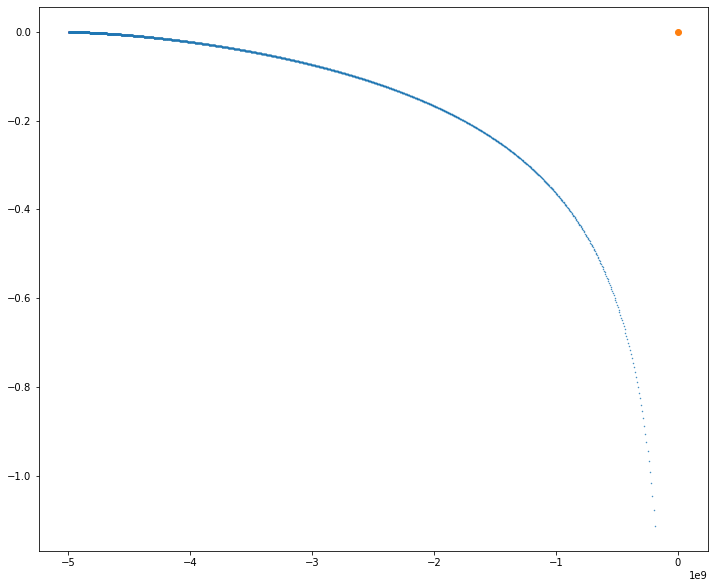

In [4]:
%matplotlib inline

fig = plt.figure(figsize=(12,10))
plt.scatter(x, y, s=0.2)
plt.scatter(0, 0)
plt.show()

 As can be seen in the plot above, the test particle is dragged by the Kerr black hole.